<a href="https://colab.research.google.com/github/dipankardas011/ml-fastai/blob/main/gettingstarted/computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install fastai

In [18]:
from fastai.vision.all import *

In [19]:
path = untar_data(URLs.PETS)

In [20]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [21]:
help(get_image_files)

Help on function get_image_files in module fastai.data.transforms:

get_image_files(path, recurse=True, folders=None)
    Get image files in `path` recursively, only in `folders`, if specified.



In [22]:
files = get_image_files(path/"images")
len(files)

7390

In [23]:
help(ImageDataLoaders)

Help on class ImageDataLoaders in module fastai.vision.data:

class ImageDataLoaders(fastai.data.core.DataLoaders)
 |  ImageDataLoaders(*loaders, path: 'str | Path' = '.', device=None)
 |  
 |  Basic wrapper around several `DataLoader`s with factory methods for computer vision problems
 |  
 |  Method resolution order:
 |      ImageDataLoaders
 |      fastai.data.core.DataLoaders
 |      fastcore.basics.GetAttr
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  from_csv(path, csv_fname='labels.csv', header='infer', delimiter=None, *, valid_pct=0.2, seed=None, fn_col=0, folder=None, suff='', label_col=1, label_delim=None, y_block=None, valid_col=None, item_tfms=None, batch_tfms=None, img_cls=<class 'fastai.vision.core.PILImage'>, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) from builtins.type
 |      Create from `path/csv_fname` using `fn_col` and `label_col`
 |  
 |  from_name_func(path: 'str | Path', fnames: 'list', label_func: 'callable', *,

In [24]:
help(ImageDataLoaders.from_name_func)

Help on method from_name_func in module fastai.vision.data:

from_name_func(path: 'str | Path', fnames: 'list', label_func: 'callable', *, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, img_cls=<class 'fastai.vision.core.PILImage'>, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) -> 'DataLoaders' method of builtins.type instance
    Create from the name attrs of `fnames` in `path`s with `label_func`



In [25]:
def label_func(f): return f[0].isupper()

In [26]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

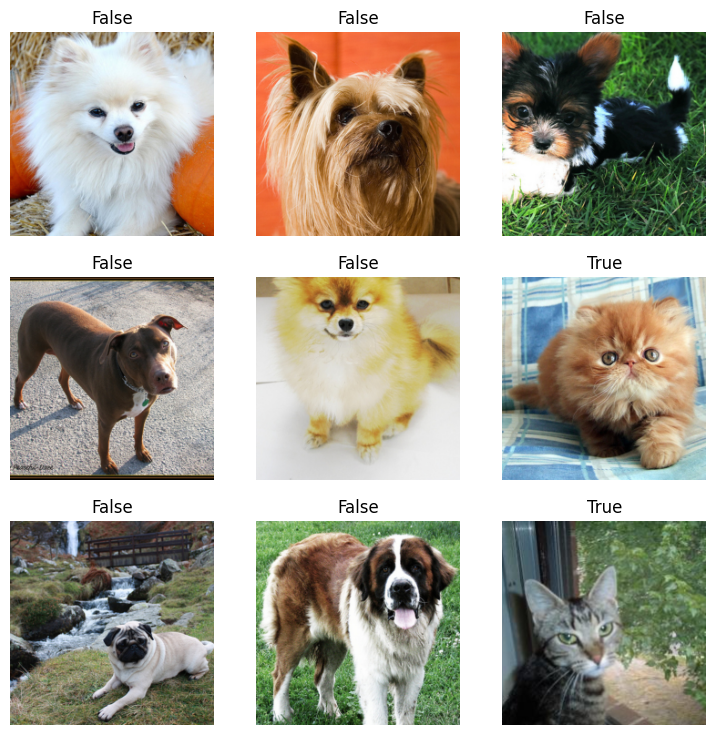

In [27]:
dls.show_batch()

In [28]:
help(vision_learner)

Help on function vision_learner in module fastai.vision.learner:

vision_learner(dls, arch, normalize=True, n_out=None, pretrained=True, weights=None, loss_func=None, opt_func=<function Adam at 0x7b1e5e050280>, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, init=<function kaiming_normal_ at 0x7b1e878d1990>, custom_head=None, concat_pool=True, pool=True, lin_ftrs=None, ps=0.5, first_bn=True, bn_final=False, lin_first=False, y_range=None, *, n_in=3)
    Build a vision learner from `dls` and `arch`



In [29]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


In [30]:
help(learn.fine_tune)

Help on method fine_tune in module fastai.callback.schedule:

fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, *, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False, start_epoch=0) method of fastai.learner.Learner instance
    Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR.



In [31]:
learn.fine_tune(1)

In [32]:
learn.predict(files[0])

('False', tensor(0), tensor([9.9996e-01, 4.1076e-05]))

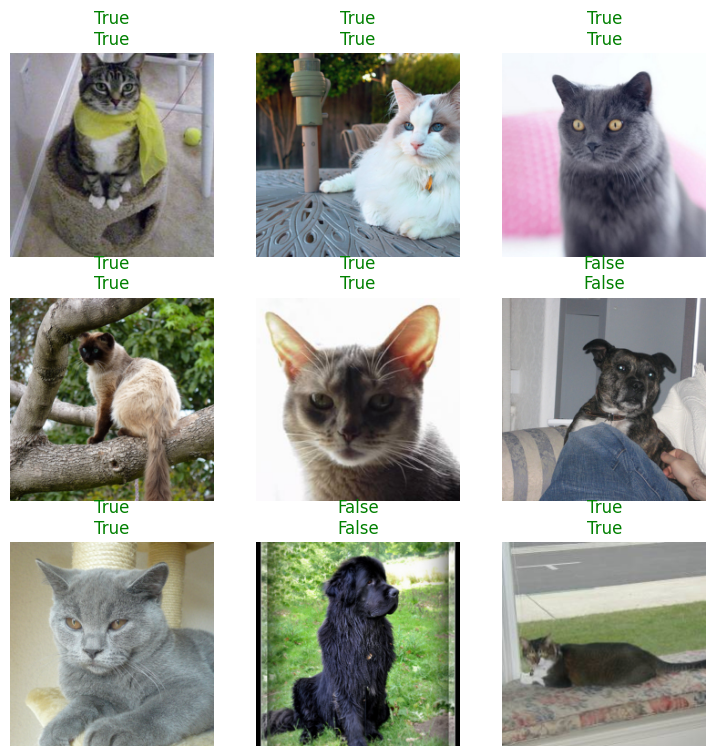

In [33]:
learn.show_results()

In [34]:
files


(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_178.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_45.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_122.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_194.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_198.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_49.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_116.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_52.jpg')...]

In [35]:
files[0].name

'havanese_178.jpg'

In [36]:
pat = r'^(.*)_\d+.jpg'

In [37]:
help(ImageDataLoaders.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path, fnames, pat, *, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) method of builtins.type instance
    Create from the name attrs of `fnames` in `path`s with re expression `pat`



In [38]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

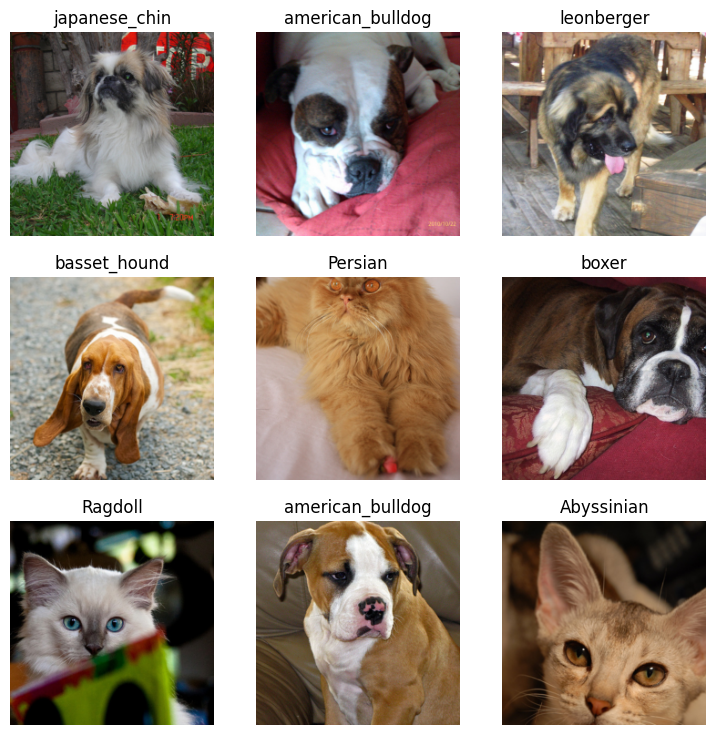

In [39]:
dls.show_batch()

In [40]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

In [41]:
help(aug_transforms)

Help on function aug_transforms in module fastai.vision.augment:

aug_transforms(mult: 'float' = 1.0, do_flip: 'bool' = True, flip_vert: 'bool' = False, max_rotate: 'float' = 10.0, min_zoom: 'float' = 1.0, max_zoom: 'float' = 1.1, max_lighting: 'float' = 0.2, max_warp: 'float' = 0.2, p_affine: 'float' = 0.75, p_lighting: 'float' = 0.75, xtra_tfms: 'list' = None, size: 'int | tuple' = None, mode: 'str' = 'bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
    Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.



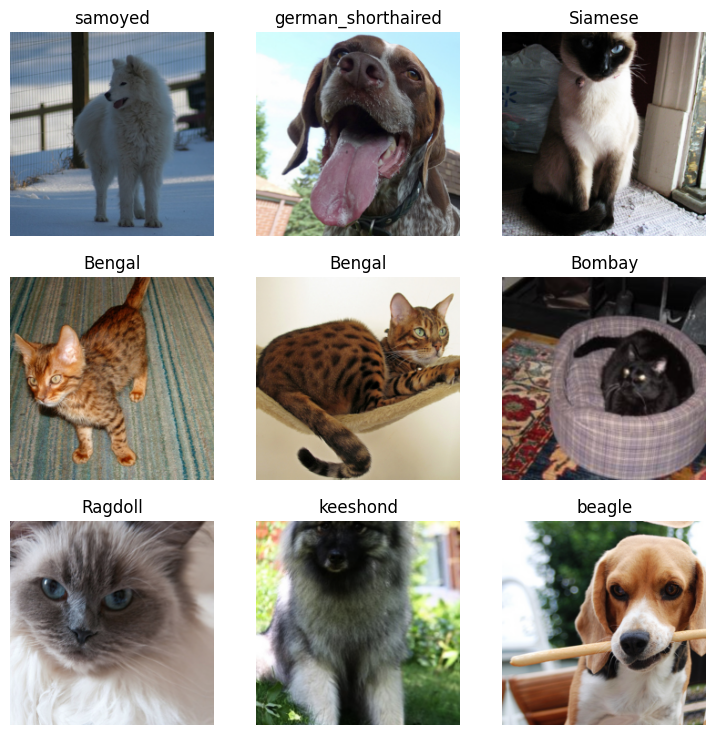

In [42]:
dls.show_batch()

In [43]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0005754399462603033)

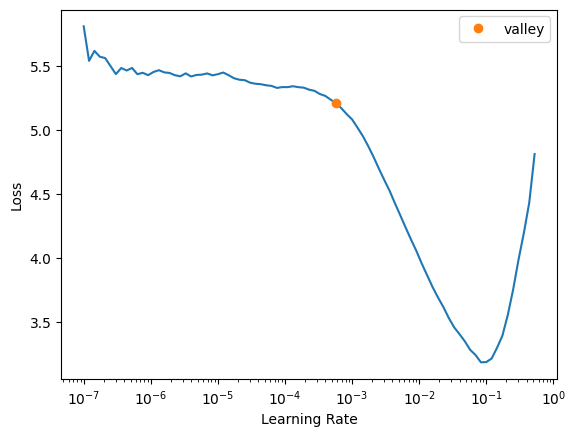

In [44]:
learn.lr_find()

In [45]:
help(learn.lr_find)

Help on method lr_find in module fastai.callback.schedule:

lr_find(start_lr=1e-07, end_lr=10, num_it=100, stop_div=True, show_plot=True, suggest_funcs=<function valley at 0x7b1e5dc3d240>) method of fastai.learner.Learner instance
    Launch a mock training to find a good learning rate and return suggestions based on `suggest_funcs` as a named tuple



In [46]:
help(learn.fine_tune)

Help on method fine_tune in module fastai.callback.schedule:

fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, *, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False, start_epoch=0) method of fastai.learner.Learner instance
    Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR.



In [47]:
learn.fine_tune(2, base_lr=0.0005754399462603033)

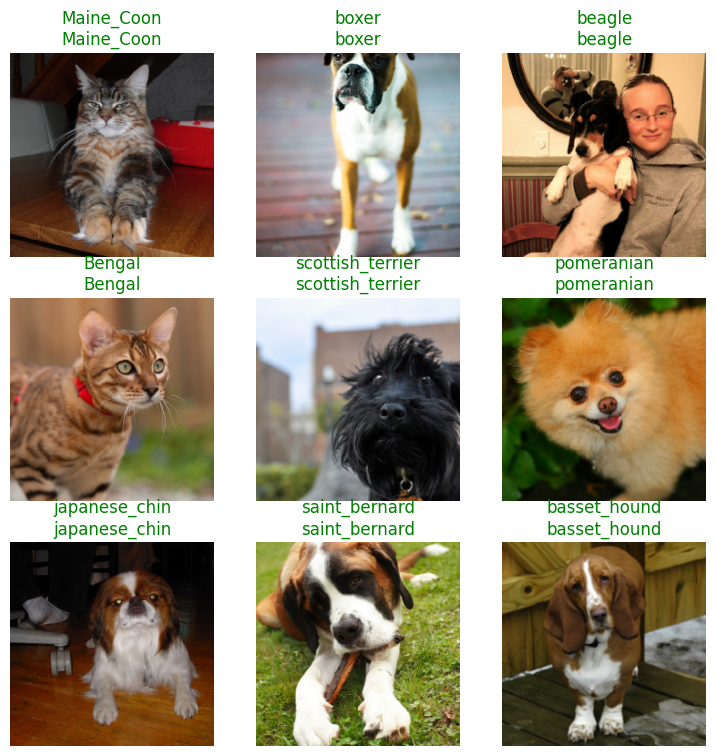

In [48]:
learn.show_results()